# Business Understanding
The loan-providing companies find it hard to give loans to people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company specialising in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide on loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business for the company.
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 

The data given below contains information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had a late payment of more than X days on at least one of the first Y instalments of the loan in our sample,
All other cases: All other cases when the payment is paid on time.
 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The company has approved the loan application
Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
Unused offer: The loan has been cancelled by the client but at different stages of the process.
 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

# Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of the loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

In [1]:
##Importing all the neccessary libraries

import numpy as np
import pandas as pd

#for visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',200)
pd.set_option('display.width',100)
pd.set_option('display.expand_frame_repr',False)

# Dataset1 "application_data.csv"¶



# 1 reading and understanding the data

In [4]:
#importing the dataset
app_data=pd.read_csv("application_data.csv")
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#understanding the dataset
#check the rows and columns of the dataset
app_data.shape

(307511, 122)

In [6]:
#checking datatypes of each field in dataframe
app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
app_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# checking the numeric variables of the dataframes
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# 2. Data Cleaning and Handling

# Null values/Missing values treatment

In [9]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
#checking the null/missing values
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
#check the percentage of null/missing values of each columns

def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)

In [12]:
null_values(app_data)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [13]:
#checking the columns having more than 40% null values
null_cols=null_values(app_data)[null_values(app_data)>40]
print(null_cols)
len(null_cols)


COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

49

In [14]:
# drop all these columns
null_cols.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG',
       'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI',
       'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUA

In [15]:
#dropping all columns which have 40% null/missing values 
app_data.drop(columns=null_cols.index,inplace=True)
app_data.shape

(307511, 73)

In [16]:
#after dropping checking the null/missing values 
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [17]:
mod=app_data.isnull().sum().sort_values(ascending=False).head(20)
print(mod)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
dtype: int64


# Imputing values

In [18]:
#OCCUPATION_TYPE 
mode=app_data["OCCUPATION_TYPE"].mode()[0]
app_data["OCCUPATION_TYPE"]=app_data["OCCUPATION_TYPE"].fillna(mode)
print(mode)

Laborers


In [19]:
#NAME_TYPE_SUITE
mode=app_data["NAME_TYPE_SUITE"].mode()[0]
app_data["NAME_TYPE_SUITE"]=app_data["NAME_TYPE_SUITE"].fillna(mode)
print(mode)

Unaccompanied


In [20]:
#EXT_SOURCE_3
mode=app_data["EXT_SOURCE_3"].mode()[0]
app_data["EXT_SOURCE_3"]=app_data["EXT_SOURCE_3"].fillna(mode)
print(mode)

0.746300213050371


In [21]:
#AMT_ANNUITY
mode=app_data["AMT_ANNUITY"].mode()[0]
app_data["AMT_ANNUITY"]=app_data["AMT_ANNUITY"].fillna(mode)
print(mode)

9000.0


<AxesSubplot:xlabel='AMT_ANNUITY'>

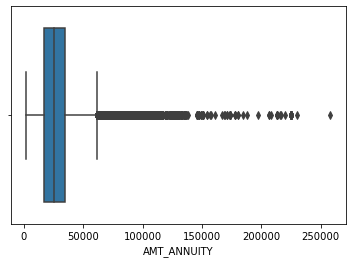

In [22]:
sns.boxplot(app_data['AMT_ANNUITY'])

In [23]:
#CNT_FAM_MEMBERS
mode=app_data["CNT_FAM_MEMBERS"].mode()[0]
app_data["CNT_FAM_MEMBERS"]=app_data["CNT_FAM_MEMBERS"].fillna(mode)
print(mode)

2.0


<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

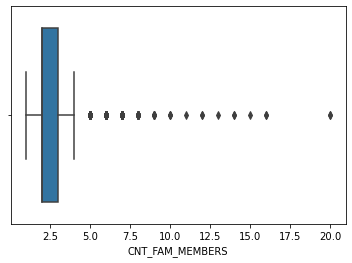

In [24]:
sns.boxplot(app_data['CNT_FAM_MEMBERS'])

In [25]:
#EXT_SOURCE_2
mode=app_data["EXT_SOURCE_2"].mode()[0]
app_data["EXT_SOURCE_2"]=app_data["EXT_SOURCE_2"].fillna(mode)
print(mode)

0.2858978721410488


In [26]:
#AMT_GOODS_PRICE
mode=app_data["AMT_GOODS_PRICE"].mode()[0]
app_data["AMT_GOODS_PRICE"]=app_data["AMT_GOODS_PRICE"].fillna(mode)
print(mode)

450000.0


In [27]:
#DAYS_LAST_PHONE_CHANGE
mode=app_data["DAYS_LAST_PHONE_CHANGE"].mode()[0]
app_data["DAYS_LAST_PHONE_CHANGE"]=app_data["DAYS_LAST_PHONE_CHANGE"].fillna(mode)
print(mode)

0.0


In [28]:
#soc_cir=["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]

In [29]:
#app_data.fillna(app_data[soc_cir].median(),inplace = True)

In [30]:
#amt_c=["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
#"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [31]:
##app_data.fillna(app_data[amt_c].median(),inplace = True)

In [32]:
#app_data.isnull().sum()

In [33]:
#unwanted columns 
unwanted_cols= ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE']

<AxesSubplot:>

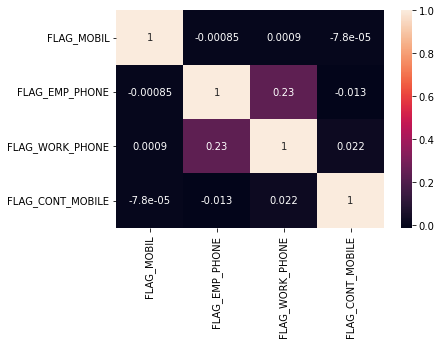

In [34]:
sns.heatmap(app_data[unwanted_cols].corr(),annot= True)

In [35]:
list_col = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [36]:
#dropping the columns
app_data=app_data.drop(list_col,axis = 1)

In [37]:
app_data.shape

(307511, 31)

# checking XNA values

In [38]:
app_data['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [39]:
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [40]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,1.0,1,1,15,0,0,0,0,0,0,Services
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,Laborers,1.0,2,2,8,0,0,0,0,0,0,XNA
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,1.0,3,3,9,0,0,0,0,1,1,School
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,2.0,2,2,9,0,0,0,1,1,0,Business Entity Type 1


In [41]:
# In CODE_GENDER ['M' 'F' 'XNA'] since XNA values are very low so remove rows which has value XNA
app_data = app_data.loc[app_data['CODE_GENDER'] != 'XNA']

In [42]:
app_data.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [43]:
app_data.shape

(307507, 31)

In [44]:
# For Organization column

app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 31)

In [45]:
app_data['ORGANIZATION_TYPE'].describe()

count                     307507
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [46]:
# Dropping the rows of total 55374 have 'XNA' values in the organization type column

app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 31)

# Standardize Values

In [47]:
#NEGATIVE TO POSITIVE
app_data.DAYS_BIRTH = app_data.DAYS_BIRTH.abs()
app_data.DAYS_EMPLOYED =app_data.DAYS_EMPLOYED.abs()
app_data.DAYS_REGISTRATION =app_data.DAYS_REGISTRATION.abs()
app_data.DAYS_ID_PUBLISH =app_data.DAYS_ID_PUBLISH.abs()

In [48]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion


In [49]:
#checking outliers and treating them
app_data= app_data.fillna(app_data.median())

In [50]:
app_data['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     90000.0
0.20    112500.0
0.30    121500.0
0.40    135000.0
0.50    157500.0
0.60    180000.0
0.70    202500.0
0.80    225000.0
0.90    270000.0
0.99    517500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [51]:
app_data["AMT_INCOME_TOTAL"].max()

117000000.0

In [52]:
app_data['AMT_INCOME_TOTAL']=app_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
ranges= ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [53]:
round((app_data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        51.55
2L-3L        22.91
0-1L         17.34
3L-4L         5.33
4L-5L         1.95
5L-6L         0.41
6L-7L         0.32
8L-9L         0.11
7L-8L         0.06
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [54]:
app_data['AMT_GOODS_PRICE']=app_data['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

app_data['AMT_GOODS_PRICE_RANGE']=pd.cut(app_data['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [55]:
round((app_data["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        19.62
4L-5L        19.06
6L-7L        12.83
10L Above    11.56
1L-2L        10.42
8L-9L         7.61
3L-4L         6.94
5L-6L         4.11
7L-8L         2.74
9L-10L        2.57
0-1L          2.53
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [56]:
app_data['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11250.0
0.20    15264.0
0.30    19125.0
0.40    22437.0
0.50    25834.5
0.60    29151.0
0.70    32863.5
0.80    38155.5
0.90    46701.0
0.99    71095.5
Name: AMT_ANNUITY, dtype: float64

In [57]:
app_data['AMT_ANNUITY'].agg(['min','max'])

min      1980.0
max    258025.5
Name: AMT_ANNUITY, dtype: float64

In [58]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_data['AMT_ANNUITY_RANGE'] = pd.cut(app_data['AMT_ANNUITY'],bins,labels=ranges)

In [59]:
round((app_data["AMT_CREDIT"].value_counts(normalize = True)*100),2)

450000.0     3.48
675000.0     2.82
180000.0     2.72
270000.0     2.62
225000.0     2.54
             ... 
1006888.5    0.00
1689736.5    0.00
296671.5     0.00
495486.0     0.00
743863.5     0.00
Name: AMT_CREDIT, Length: 5331, dtype: float64

In [60]:
# creating "days_col" varibale to store all DAYS columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED"]

app_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,252133.000000,252133.000000
mean,14769.152336,2384.142254
std,3662.562670,2338.327666
min,7489.000000,0.000000
25%,11775.000000,767.000000
50%,14573.000000,1648.000000
75%,17563.000000,3175.000000
max,25200.000000,17912.000000


In [61]:
app_data[days_col]= abs(app_data[days_col])
app_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,252133.000000,252133.000000
mean,14769.152336,2384.142254
std,3662.562670,2338.327666
min,7489.000000,0.000000
25%,11775.000000,767.000000
50%,14573.000000,1648.000000
75%,17563.000000,3175.000000
max,25200.000000,17912.000000


In [62]:
app_data["AGE"] = app_data["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

app_data["AGE_GROUP"] = pd.cut(app_data["AGE"], bins=bins, labels=slots)
app_data["AGE_GROUP"].value_counts(normalize= True)*100

35-40       16.865702
40-45       16.169244
30-35       15.579476
45-50       13.465116
25-30       12.992349
50-55       12.148747
55-60        5.590304
20-25        4.808970
60 Above     2.380093
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [63]:

app_data["YEARS_EMPLOYED"] = app_data["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

app_data["EMPLOYEMENT_YEARS"] = pd.cut(app_data["YEARS_EMPLOYED"], bins=bins, labels=slots)
app_data["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.062372
5-10        25.728689
10-15       10.926463
15-20        4.302922
20-25        2.476094
25-30        1.311620
30 Above     1.191841
Name: EMPLOYEMENT_YEARS, dtype: float64

In [64]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64


In [65]:
#checking categorical column
cat_cols= app_data.select_dtypes(include=['object']).columns
cat_cols 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [66]:
len(cat_cols)

9

In [67]:
#continous columns
cont_cols= app_data.select_dtypes(include=['float64','int64','category']).columns
cont_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'AMT_INCOME_RANGE',
       'AMT_GOODS_PRICE_RANGE', 'AMT_ANNUITY_RANGE', 'AGE', 'AGE_GROUP', 'YEARS_EMPLOYED',
       'EMPLOYEMENT_YEARS'],
      dtype='object')

In [68]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252133 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   252133 non-null  int64   
 1   TARGET                       252133 non-null  int64   
 2   NAME_CONTRACT_TYPE           252133 non-null  object  
 3   CODE_GENDER                  252133 non-null  object  
 4   CNT_CHILDREN                 252133 non-null  int64   
 5   AMT_INCOME_TOTAL             252133 non-null  float64 
 6   AMT_CREDIT                   252133 non-null  float64 
 7   AMT_ANNUITY                  252133 non-null  float64 
 8   AMT_GOODS_PRICE              252133 non-null  float64 
 9   NAME_TYPE_SUITE              252133 non-null  object  
 10  NAME_INCOME_TYPE             252133 non-null  object  
 11  NAME_EDUCATION_TYPE          252133 non-null  object  
 12  NAME_FAMILY_STATUS           252133 non-null

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

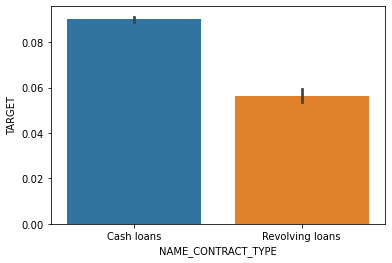

In [69]:
sns.barplot(app_data["NAME_CONTRACT_TYPE"],app_data["TARGET"])

In [70]:
app_data["age"]=round(app_data["DAYS_BIRTH"]/365.0)

In [71]:
app_data["age"]=(app_data["age"])
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_GOODS_PRICE_RANGE,AMT_ANNUITY_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,age
0,100002,1,Cash loans,M,0,2.025,406597.5,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,2L-3L,3L-4L,0-25K,25.920548,25-30,1.745205,0-5,26.0
1,100003,0,Cash loans,F,0,2.700,1293502.5,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,2L-3L,10L Above,25K-50K,45.931507,45-50,3.254795,0-5,46.0
2,100004,0,Revolving loans,M,0,0.675,135000.0,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0-1L,1L-2L,0-25K,52.180822,50-55,0.616438,0-5,52.0
3,100006,0,Cash loans,F,0,1.350,312682.5,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,17,0,0,0,0,0,0,Business Entity Type 3,1L-2L,2L-3L,25K-50K,52.068493,50-55,8.326027,5-10,52.0
4,100007,0,Cash loans,M,0,1.215,513000.0,21865.5,5.130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,11,0,0,0,0,1,1,Religion,1L-2L,5L-6L,0-25K,54.608219,50-55,8.323288,5-10,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,0,1.530,331920.0,16096.5,2.250,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,16705,7258,9798.0,259,Sales staff,1.0,2,2,11,0,0,0,0,0,0,Self-employed,1L-2L,2L-3L,0-25K,45.767123,45-50,19.884932,15-20,46.0
307506,456251,0,Cash loans,M,0,1.575,254700.0,27558.0,2.250,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,Sales staff,1.0,1,1,15,0,0,0,0,0,0,Services,1L-2L,2L-3L,25K-50K,25.553425,25-30,0.646575,0-5,26.0
307508,456253,0,Cash loans,F,0,1.530,677664.0,29979.0,5.850,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,14966,7921,6737.0,5150,Managers,1.0,3,3,9,0,0,0,0,1,1,School,1L-2L,5L-6L,25K-50K,41.002740,40-45,21.701370,20-25,41.0
307509,456254,1,Cash loans,F,0,1.710,370107.0,20205.0,3.195,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,11961,4786,2562.0,931,Laborers,2.0,2,2,9,0,0,0,1,1,0,Business Entity Type 1,1L-2L,3L-4L,0-25K,32.769863,30-35,13.112329,10-15,33.0


<AxesSubplot:xlabel='AMT_GOODS_PRICE_RANGE', ylabel='AMT_INCOME_TOTAL'>

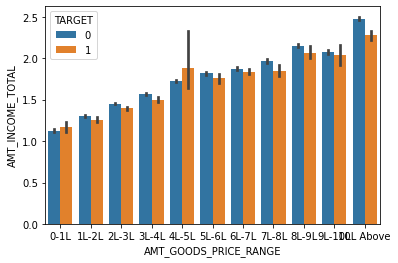

In [72]:
sns.barplot(app_data["AMT_GOODS_PRICE_RANGE"],app_data["AMT_INCOME_TOTAL"],hue=app_data["TARGET"])

In [73]:

tar1 = app_data[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index = False).mean()
tar1['PERCENTAGE'] = tar1['TARGET']*100

In [74]:
tar1

,NAME_CONTRACT_TYPE,TARGET,PERCENTAGE
0,Cash loans,0.090048,9.004792
1,Revolving loans,0.056505,5.650546


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='PERCENTAGE'>

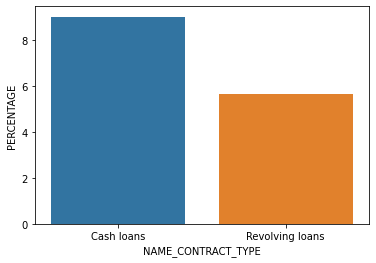

In [75]:
sns.barplot(tar1["NAME_CONTRACT_TYPE"],tar1["PERCENTAGE"])

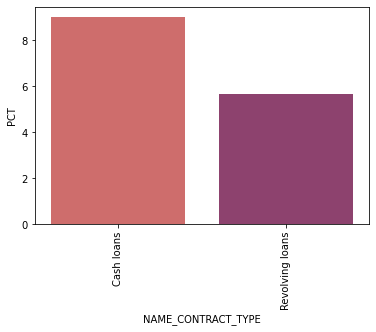

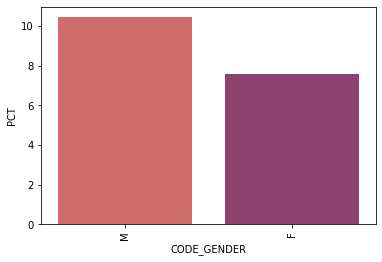

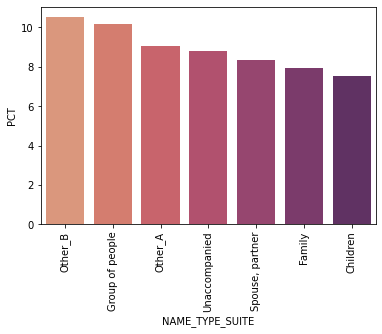

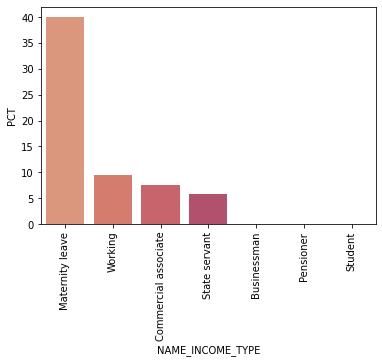

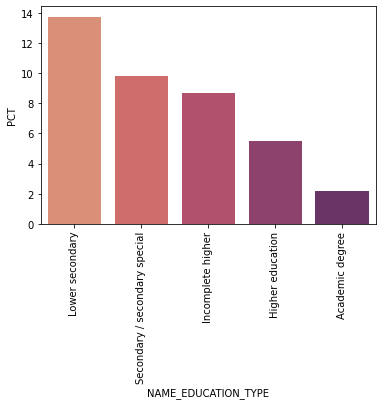

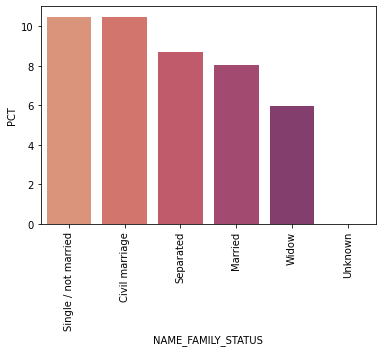

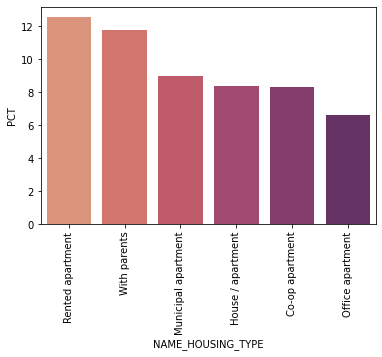

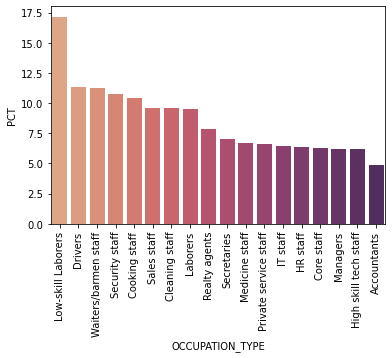

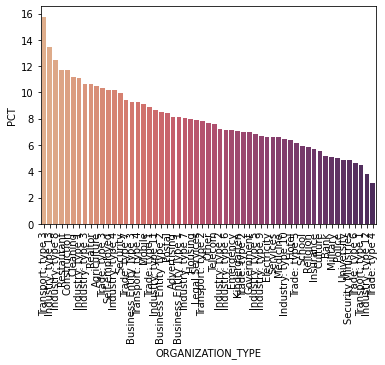

In [81]:
for j in cat_cols:
    tar1= app_data[[j,'TARGET']].groupby([j], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    tar1['PCT'] = tar1['TARGET']*100
    sns.barplot(data=tar1,x=j,y='PCT',palette='flare')
    plt.xticks(rotation=90)
    plt.show()

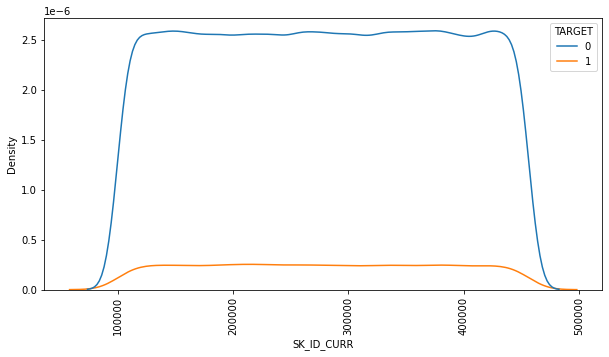

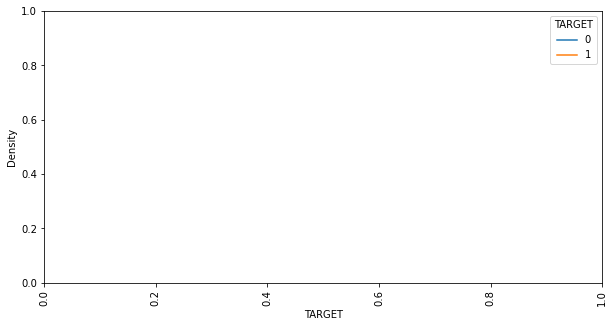

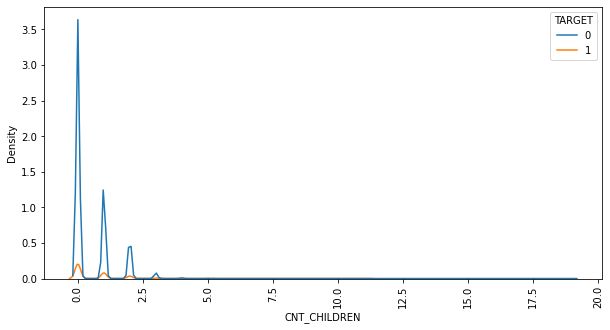

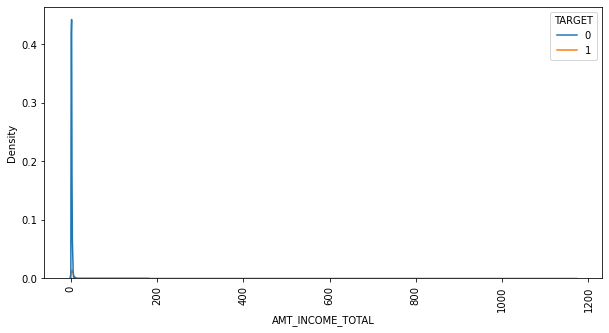

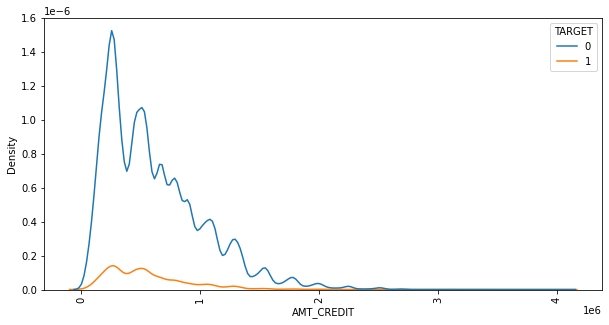

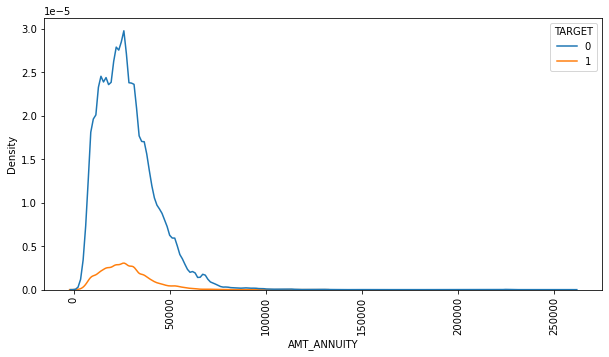

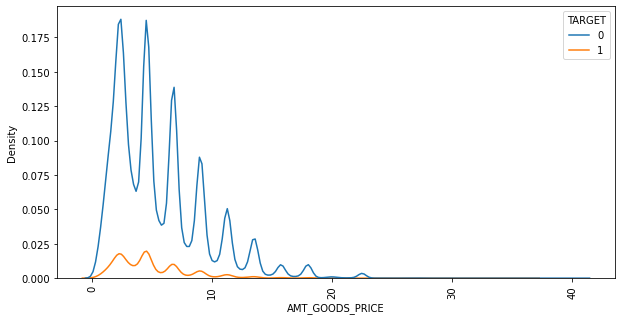

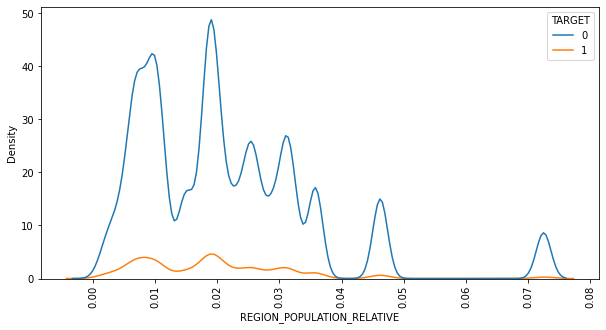

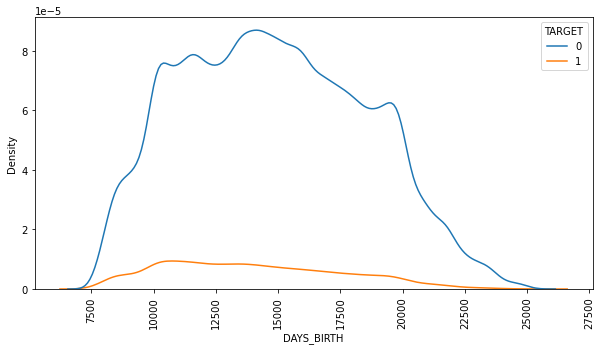

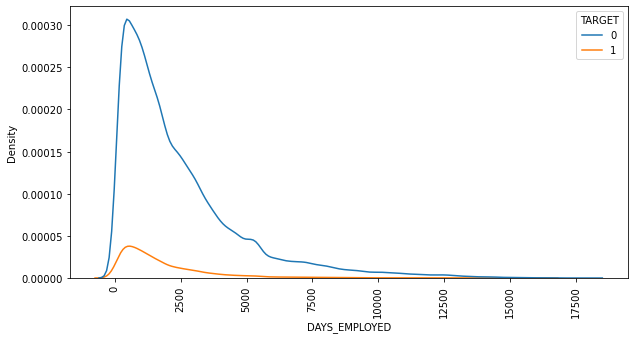

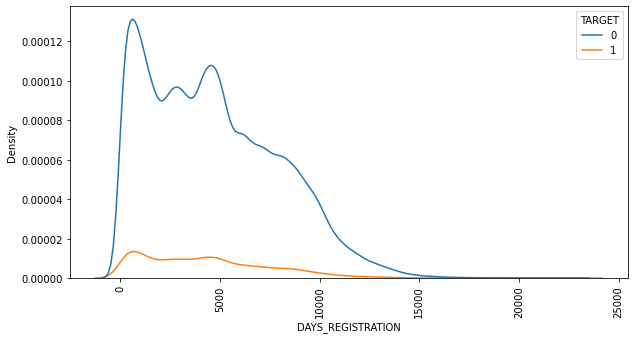

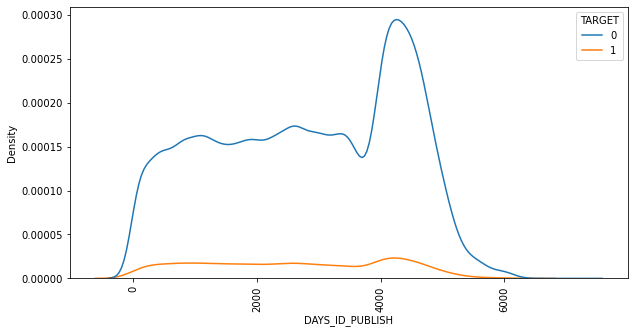

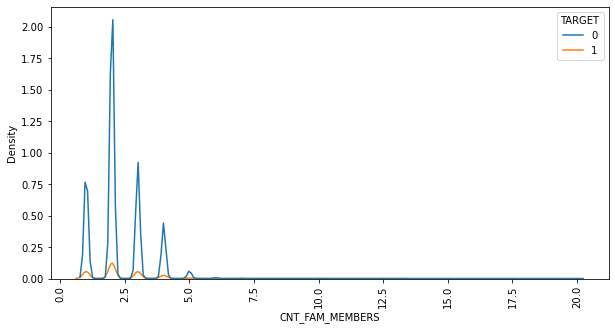

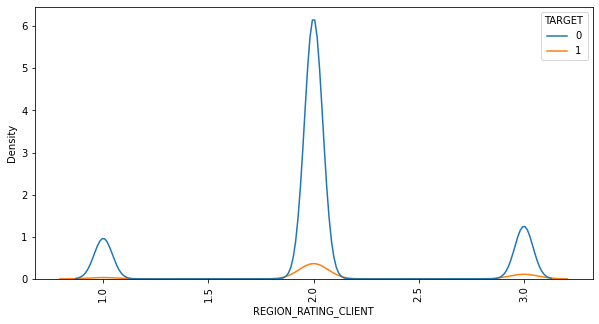

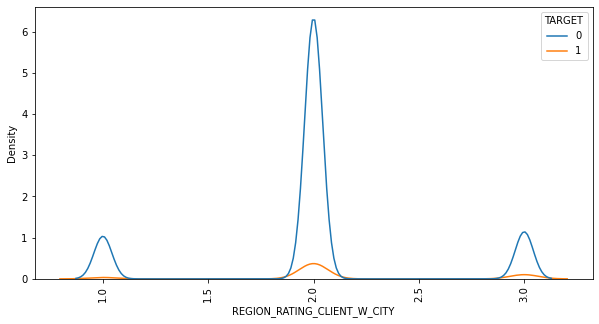

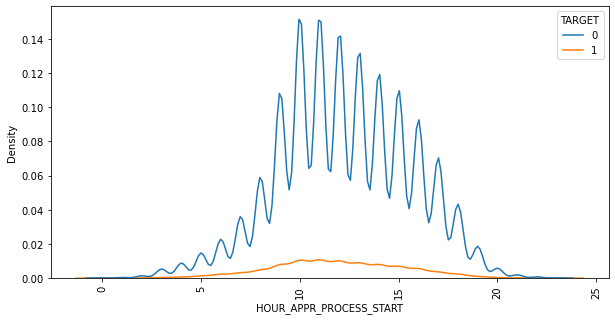

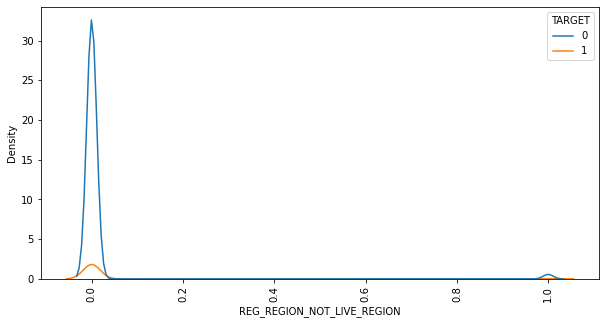

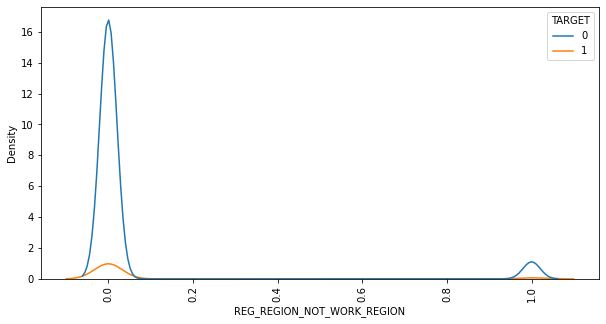

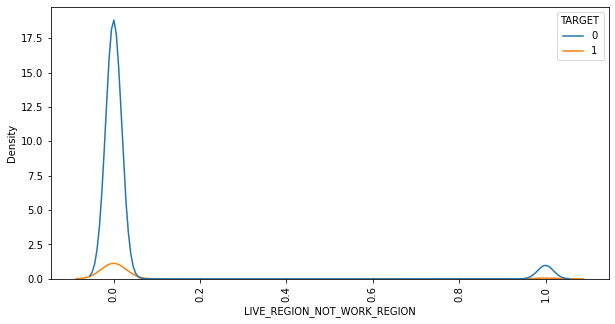

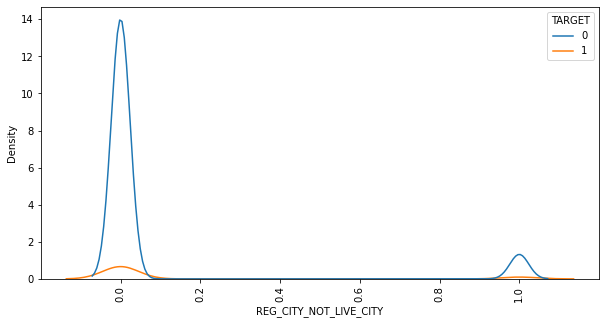

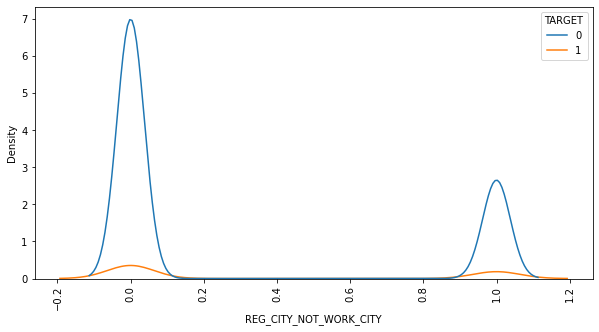

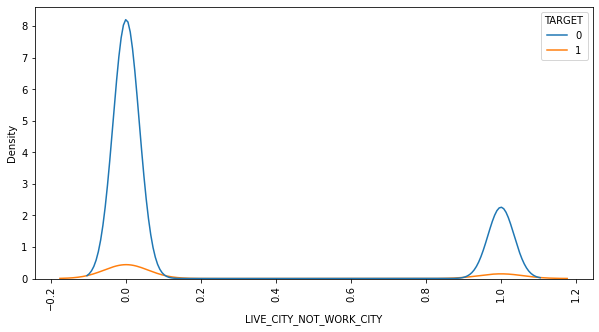

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

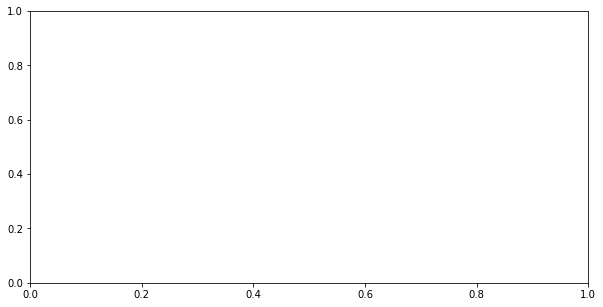

In [79]:
for i in cont_cols:
    plt.figure(figsize = (10,5))
    sns.kdeplot(app_data[i],hue = app_data['TARGET'])
    plt.xticks(rotation = 90)
    plt.show()
 

In [82]:
cont_data = app_data[cont_cols]
cont_data['TARGET'].value_counts()/cont_data.shape[0]*100

0    91.339888
1     8.660112
Name: TARGET, dtype: float64

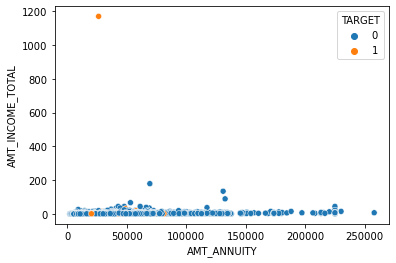

In [83]:
#bivaraite analysis checking 
sns.scatterplot(data = cont_data,x ='AMT_ANNUITY' , y = 'AMT_INCOME_TOTAL', hue= app_data['TARGET'])
plt.show()

In [84]:
app_data['NAME_EDUCATION_TYPE'].unique()
app_data.dtypes.value_counts()

int64       15
float64     10
object       9
category     2
category     1
category     1
category     1
dtype: int64

# Checking for imbalance in Target


In [85]:
app_data['TARGET'].value_counts(normalize=True)*100

0    91.339888
1     8.660112
Name: TARGET, dtype: float64

In [86]:
Target0 = app_data.loc[app_data.TARGET == 0]
Target1 = app_data.loc[app_data.TARGET == 1]

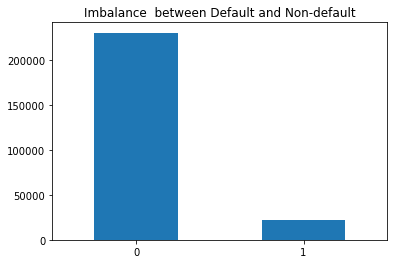

In [87]:
app_data['TARGET'].value_counts().plot(kind='bar')
plt.title('Imbalance  between Default and Non-default')
plt.xticks(rotation = 0)
plt.show()

# Dataset-2 "previous_application.csv"

In [88]:
#importing the dataset
prev_data=pd.read_csv("previous_application.csv")
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#understanding the dataset
#check the rows and columns of the dataset
prev_data.shape

(1670214, 37)

There are 37 columns having various data types like object, int, float and 1670214 rows.

In [90]:
#checking datatypes of each field in dataframe
prev_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [91]:
prev_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [92]:
# checking the numeric variables of the dataframes
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Data Cleaning and Handling 


# Null values/Missing values treatment

In [93]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [94]:
#checking the null/missing values
prev_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [95]:
#check the percentage of null/missing values of each column
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)
#round(100*prev_data.isnull().mean().sort_values(ascending = False),2)
null_values(prev_data)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [96]:
#checking null/missing values more than 40%
null_col = null_values(prev_data)[null_values(prev_data)>40]
null_col

RATE_INTEREST_PRIVILEGED     99.64
RATE_INTEREST_PRIMARY        99.64
AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
dtype: float64

In [97]:
#dropping more than 40% null values
prev_data.drop(columns =null_col.index,inplace = True) 

In [98]:
#checking less than 30% null nalues
null_col = null_values(prev_data)[null_values(prev_data)<30]
null_col

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
CODE_REJECT_REASON              0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
SK_ID_PREV                      0.00
NAME_PAYMENT_TYPE               0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
DAYS_DECISION                   0.00
dtype: float64

In [99]:
#AMT_GOODS_PRICE 
mode=prev_data["AMT_GOODS_PRICE"].mode()[0]
prev_data["AMT_GOODS_PRICE"]=prev_data["AMT_GOODS_PRICE"].fillna(mode)
print(mode)
prev_data.describe()

45000.0


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,1.856429e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.871413e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,4.500000e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [100]:
#AMT_ANNUITY
mode=prev_data["AMT_ANNUITY"].mode()[0]
prev_data["AMT_ANNUITY"]=prev_data["AMT_ANNUITY"].fillna(mode)
print(mode)

2250.0


In [101]:
#CNT_PAYMENT 
mode=prev_data["CNT_PAYMENT"].mode()[0]
prev_data["CNT_PAYMENT"]=prev_data["CNT_PAYMENT"].fillna(mode)
print(mode)

12.0


In [102]:
#PRODUCT_COMBINATION 
mode=prev_data["PRODUCT_COMBINATION"].mode()[0]
prev_data["PRODUCT_COMBINATION"]=prev_data["PRODUCT_COMBINATION"].fillna(mode)
print(mode)

Cash


In [103]:
prev_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [104]:
#AMT_CREDIT
mode=prev_data["AMT_CREDIT"].mode()[0]
prev_data["AMT_CREDIT"]=prev_data["AMT_CREDIT"].fillna(mode)
print(mode)

0.0


In [105]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [106]:
#dropping unwanted columns 
unwanted_cols =['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [107]:
prev_data = prev_data.drop(labels= unwanted_cols,axis = 1)

In [108]:
prev_data.shape

(1670214, 22)

# Merged dataset

In [109]:
# merge both the dataset on SK_ID_CURR with Inner Joins
merged= pd.merge(app_data, prev_data,how='inner', on='SK_ID_CURR')
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_GOODS_PRICE_RANGE,AMT_ANNUITY_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,age,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,2.025,406597.5,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,2L-3L,3L-4L,0-25K,25.920548,25-30,1.745205,0-5,26.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,2.700,1293502.5,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,2L-3L,10L Above,25K-50K,45.931507,45-50,3.254795,0-5,46.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,2.700,1293502.5,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,2L-3L,10L Above,25K-50K,45.931507,45-50,3.254795,0-5,46.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,2.700,1293502.5,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,11,0,0,0,0,0,0,School,2L-3L,10L Above,25K-50K,45.931507,45-50,3.254795,0-5,46.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,0.675,135000.0,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,9,0,0,0,0,0,0,Government,0-1L,1L-2L,0-25K,52.180822,50-55,0.616438,0-5,52.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [110]:
# checking for the null value column 
merged.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE_x             0
CODE_GENDER                      0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT_x                     0
AMT_ANNUITY_x                    0
AMT_GOODS_PRICE_x                0
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS                  0
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
HOUR_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
LIVE_REGION_NOT_WORK_REGION      0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CI

In [111]:
merged.shape

(1140063, 60)

In [112]:
merged.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140063 entries, 0 to 1140062
Data columns (total 60 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1140063 non-null  int64   
 1   TARGET                       1140063 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1140063 non-null  object  
 3   CODE_GENDER                  1140063 non-null  object  
 4   CNT_CHILDREN                 1140063 non-null  int64   
 5   AMT_INCOME_TOTAL             1140063 non-null  float64 
 6   AMT_CREDIT_x                 1140063 non-null  float64 
 7   AMT_ANNUITY_x                1140063 non-null  float64 
 8   AMT_GOODS_PRICE_x            1140063 non-null  float64 
 9   NAME_TYPE_SUITE              1140063 non-null  object  
 10  NAME_INCOME_TYPE             1140063 non-null  object  
 11  NAME_EDUCATION_TYPE          1140063 non-null  object  
 12  NAME_FAMILY_STATUS          

In [113]:
merged['NAME_CONTRACT_STATUS'].unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

In [114]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

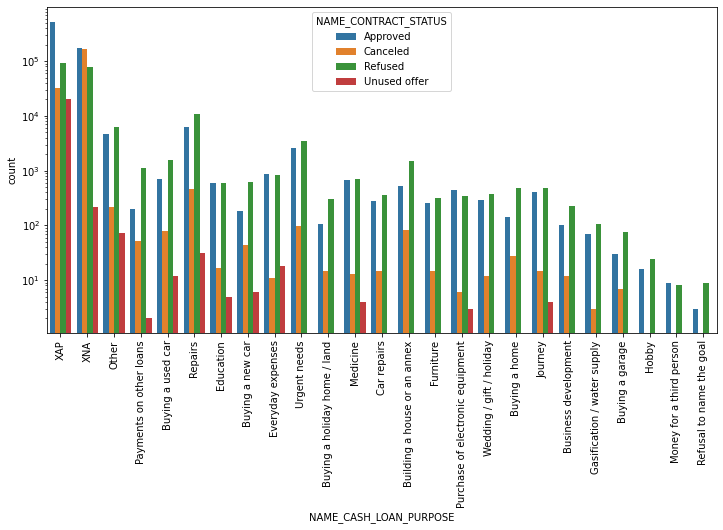

In [115]:
plt.figure(figsize=(12,6))
sns.countplot(data=merged,x="NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.yscale("log")

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

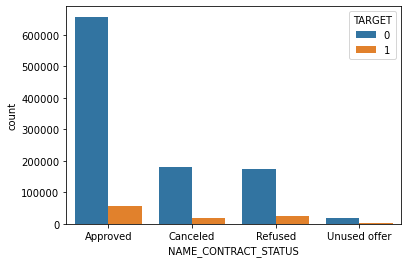

In [116]:
sns.countplot(data=merged,x="NAME_CONTRACT_STATUS",hue="TARGET")

In [117]:
merged1=merged.groupby(["NAME_CONTRACT_STATUS","TARGET"]).size().reset_index().rename(columns={0:"counts"})

In [118]:
add_1=merged1.groupby(["NAME_CONTRACT_STATUS","counts"]).sum().reset_index()
print(add_1)

  NAME_CONTRACT_STATUS  counts  TARGET
0             Approved   58297       1
1             Approved  657611       0
2             Canceled   20282       1
3             Canceled  181476       0
4              Refused   25979       1
5              Refused  175572       0
6         Unused offer    1777       1
7         Unused offer   19069       0


In [119]:
merged2=pd.merge(merged1,add_1,how="left",on="NAME_CONTRACT_STATUS")

In [120]:
merged2["pct"]=round(merged2["counts_x"]/merged2["counts_y"]*100,2)
print(merged2)

   NAME_CONTRACT_STATUS  TARGET_x  counts_x  counts_y  TARGET_y      pct
0              Approved         0    657611     58297         1  1128.04
1              Approved         0    657611    657611         0   100.00
2              Approved         1     58297     58297         1   100.00
3              Approved         1     58297    657611         0     8.86
4              Canceled         0    181476     20282         1   894.76
5              Canceled         0    181476    181476         0   100.00
6              Canceled         1     20282     20282         1   100.00
7              Canceled         1     20282    181476         0    11.18
8               Refused         0    175572     25979         1   675.82
9               Refused         0    175572    175572         0   100.00
10              Refused         1     25979     25979         1   100.00
11              Refused         1     25979    175572         0    14.80
12         Unused offer         0     19069      17

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

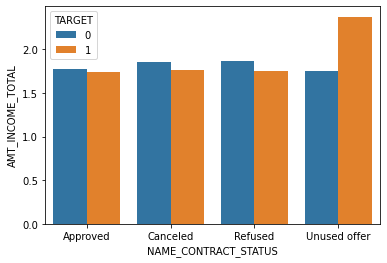

In [121]:
sns.barplot(data=merged,x="NAME_CONTRACT_STATUS",y="AMT_INCOME_TOTAL",ci=None,hue="TARGET")

In [122]:
len(merged.columns)

60

In [123]:
merged["TARGET"].value_counts(normalize=True)

0    0.906729
1    0.093271
Name: TARGET, dtype: float64

# INSIGHT

Application dataset has 122 feature and 307511 records.Previous dataset has around 37 features and 1.6 millions records.
Around 40+ cols in daraset have more than 50% of nan values ,such cols were removed as part of data cleaning process.
Null values were then replaced with mean/median/mode values of respective features in ordet to complete spare dataset.
Univariate, Bivariate analysis was performed for each  feature cat/cont .
Required visualisatiob plots each analysis.
After data cleaning and univariate /bivariate analysis:both the application and preevious application datsets were merged over 
SK_ID_CURR key for final understanding.